In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

In [88]:
df = pd.read_csv('Agrofood_co2_emission.csv')

In [89]:
df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


Text(0.5, 1.0, 'total_emission de Co2 par an')

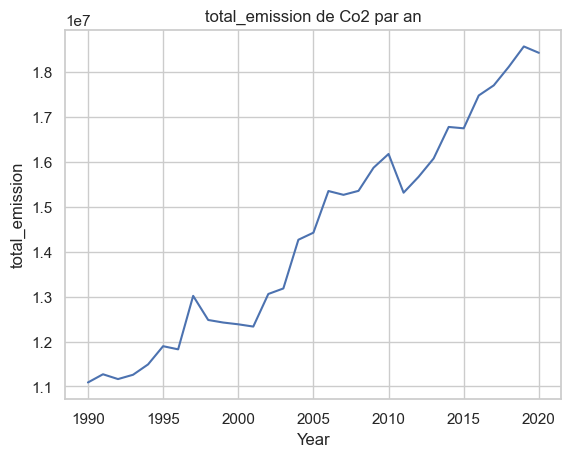

In [181]:
df.groupby('Year')['total_emission'].sum().plot()
plt.xlabel('Year')
plt.ylabel('total_emission')
plt.title('total_emission de Co2 par an')

Text(0.5, 1.0, 'Total Emission of Co2 by Year')

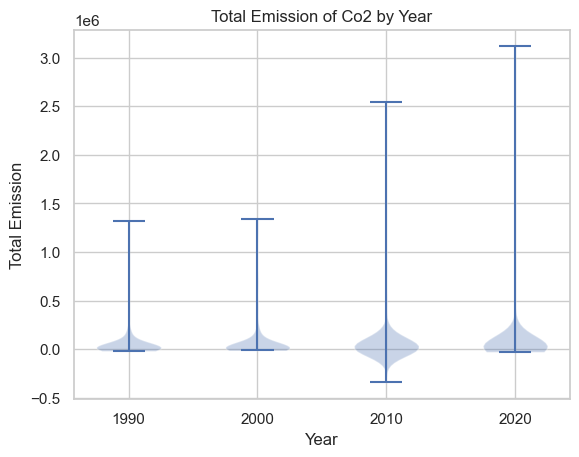

In [182]:

plt.style.use('default')
sns.set()
sns.set_style('whitegrid')

x1=df[df['Year']==1990]['total_emission']
x2=df[df['Year']==2000]['total_emission']
x3=df[df['Year']==2010]['total_emission']
x4=df[df['Year']==2020]['total_emission']

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.violinplot([x1, x2, x3, x4])
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['1990', '2000', '2010', '2020'])
ax.set_xlabel('Year')
ax.set_ylabel('Total Emission')
ax.set_title('Total Emission of Co2 by Year')


Text(0.5, 1.0, 'to 20 of most total_emission')

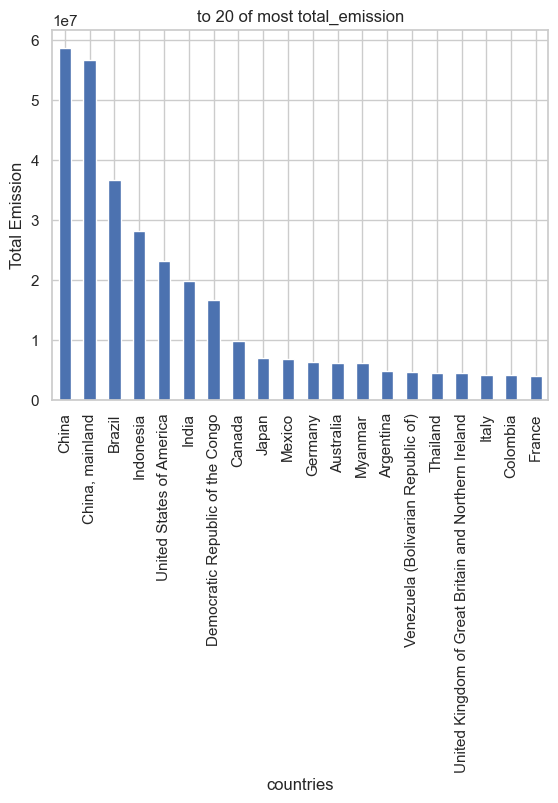

In [184]:
df.groupby('Area')['total_emission'].sum().sort_values(ascending=False).head(20).plot.bar()
plt.xlabel('countries')
plt.ylabel('Total Emission')
plt.title('to 20 of most total_emission')

Text(0.5, 1.0, 'to 20 of less total_emission')

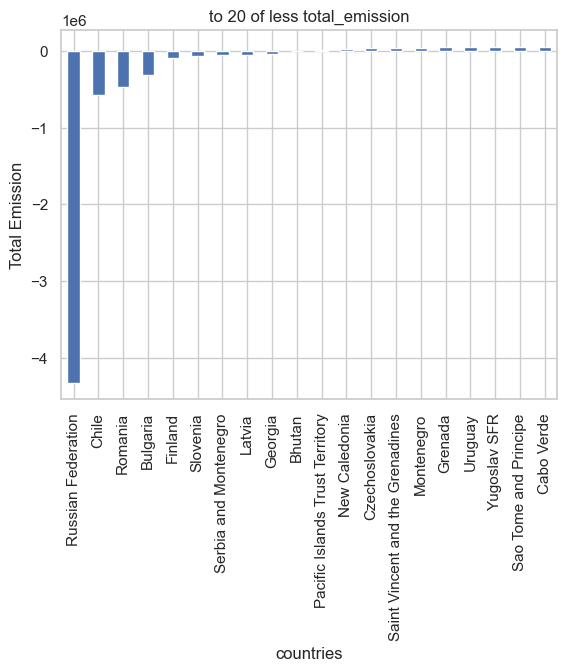

In [185]:
df.groupby('Area')['total_emission'].sum().sort_values(ascending=True).head(20).plot.bar()
plt.xlabel('countries')
plt.ylabel('Total Emission')
plt.title('to 20 of less total_emission')

<Axes: xlabel='Year', ylabel='total_emission'>

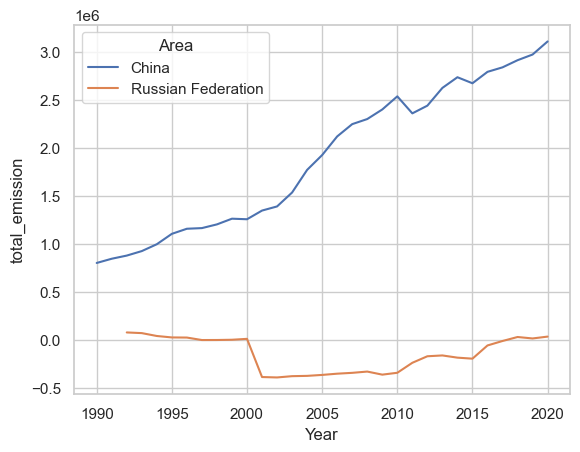

In [179]:
sns.lineplot(data=df[(df['Area']=='Russian Federation')|(df['Area']=='China')],x='Year',y='total_emission',hue='Area')

<Axes: xlabel='Year', ylabel='Average Temperature °C'>

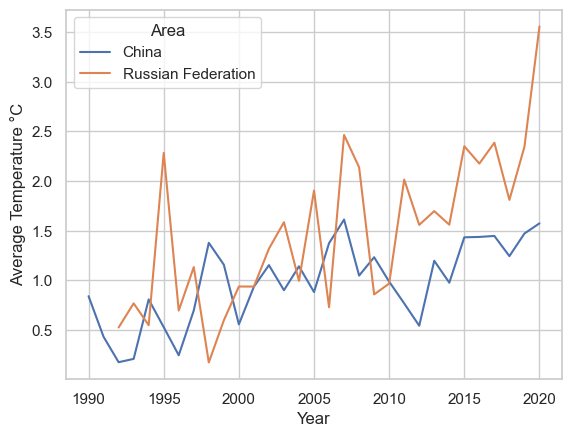

In [180]:
sns.lineplot(data=df[(df['Area']=='Russian Federation')|(df['Area']=='China')],x='Year',y='Average Temperature °C',hue='Area')

# Modele de machine learning

In [90]:
def predict_model(contrie) :
    """
    cette fonction consomme le pays en entree et retourne les resultats
    des prediction des predictions de temperatures pour les 5 prochaines annees

    """
    countries_results = {}
    contrie_df = df[df['Area'] == contrie]
    train = contrie_df[['Year', 'Average Temperature °C']].iloc[0:25]
    test = contrie_df[['Year', 'Average Temperature °C']].iloc[25:]
    model = ExponentialSmoothing(train['Average Temperature °C'], trend='add', seasonal ='add', seasonal_periods=5).fit()
    predictions = model.forecast(steps = len(test)+5)
    countries_results[contrie] = predictions
    data = pd.DataFrame(countries_results)
    return data

In [91]:
predict_model('France')

/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,France
25,1.242991
26,1.243182
27,1.466113
28,1.181800
29,1.659606
30,1.329400
31,1.329591
32,1.552521
33,1.268209
34,1.746014


In [92]:
def predict_model(country, df):
    """
    Predict future temperatures for a given country using Exponential Smoothing.

    Parameters:
    country (str): The name of the country for which the prediction is to be made.
    df (pd.DataFrame): The dataframe containing temperature data with columns 'Area', 'Year', 'Average Temperature °C'.

    Returns:
    pd.Series: A series containing the predictions.
    """
    
    country_df = df[df['Area'] == country]
    
    if country_df.empty:
        raise ValueError(f"No data available for the country: {country}")

    # Split the data into training and testing sets
    train = country_df[['Year', 'Average Temperature °C']].iloc[0:25]
    test = country_df[['Year', 'Average Temperature °C']].iloc[25:]

    # Fit the Exponential Smoothing model
    model = ExponentialSmoothing(
        train['Average Temperature °C'], 
        trend='add', 
        seasonal='add', 
        seasonal_periods=5
    ).fit()

    # Forecast future values
    predictions = model.forecast(steps=len(test) + 5)
    
    # Store the predictions with the year
    prediction_years = range(train['Year'].iloc[-1] + 1, train['Year'].iloc[-1] + 1 + len(predictions))
    predictions.index = prediction_years
    
    return predictions

# Initialize an empty DataFrame to store all predictions
all_predictions = pd.DataFrame()

# Iterate over all unique areas and accumulate the predictions
for area in df['Area'].unique():
    try:
        predictions = predict_model(area, df)
        predictions_df = pd.DataFrame({
            'Year': predictions.index,
            'Average Temperature °C': predictions.values,
            'Area': area
        })
        all_predictions = pd.concat([all_predictions, predictions_df], ignore_index=True)
    except ValueError as e:
        print(e)

print(all_predictions)


/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/anaconda3/lib/python3.11/site-packages/statsmo

Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.


/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/anaconda3/lib/

Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.


/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/anaconda3/lib/

Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.


/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/anaconda3/lib/

Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.


/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/anaconda3/lib/

Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.


/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/anaconda3/lib/

Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.


/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/anaconda3/lib/

Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
      Year  Average Temperature °C         Area
0     2015                0.975232  Afghanistan
1     2016                0.963815  Afghanistan
2     2017                0.509891  Afghanistan
3     2018                0.712431  Afghanistan
4     2019                0.714293  Afghanistan
...    ...                     ...          ...
2412  2021               -0.087604     Zimbabwe
2413  2022                0.288765     Zimbabwe
2414  2023                0.222240     Zimbabwe
2415  2024               -0.114166     Zimbabwe
2416  2025                0.367375     Zimbabwe

[2417 rows x 3 columns]


/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [93]:
df_prediction = pd.DataFrame(all_predictions)

In [96]:
df_prediction

,Year,Average Temperature °C,Area
0,2015,0.975232,Afghanistan
1,2016,0.963815,Afghanistan
2,2017,0.509891,Afghanistan
3,2018,0.712431,Afghanistan
4,2019,0.714293,Afghanistan
...,...,...,...
2412,2021,-0.087604,Zimbabwe
2413,2022,0.288765,Zimbabwe
2414,2023,0.222240,Zimbabwe
2415,2024,-0.114166,Zimbabwe


In [159]:
data = pd.merge(df, df_prediction, on=['Area', 'Year'], how='outer')

In [161]:
data.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C_x', 'Average Temperature °C_y'],
      dtype='object')

In [162]:
data.drop(columns = ['Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',], inplace=True)

In [165]:
data.rename(columns={'Average Temperature °C_x': 'Average Temperature °C',
                     'Average Temperature °C_y': 'Average Prediction'}, inplace=True)

In [166]:
data

,Area,Year,Average Temperature °C,Average Prediction
0,Afghanistan,1990,0.536167,NaN
1,Afghanistan,1991,0.020667,NaN
2,Afghanistan,1992,-0.259583,NaN
3,Afghanistan,1993,0.101917,NaN
4,Afghanistan,1994,0.372250,NaN
...,...,...,...,...
8105,Zimbabwe,2021,NaN,-0.087604
8106,Zimbabwe,2022,NaN,0.288765
8107,Zimbabwe,2023,NaN,0.222240
8108,Zimbabwe,2024,NaN,-0.114166


In [169]:
continent_mapping = {
    'Africa': ['Sao Tome and Principe', 'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Côte d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe', 'Mayotte', 'Ethiopia PDR', 'United Republic of Tanzania', 'Democratic Republic of the Congo', 'Western Sahara', 'Saint Helena, Ascension and Tristan da Cunha'],
    'Asia': ['Republic of Korea', 'Syrian Arab Republic', 'Iran (Islamic Republic of)', 'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen', 'Lao People\'s Democratic Republic', 'Viet Nam', 'Democratic People\'s Republic of Korea', 'Brunei Darussalam'],
    'Europe': ['Russian Federation','Czechia', 'Netherlands (Kingdom of the)', 'Gibraltar', 'Republic of Moldova', 'United Kingdom of Great Britain and Northern Ireland', 'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City', 'Isle of Man', 'Yugoslav SFR', 'USSR', 'Czechoslovakia', 'Faroe Islands', 'Channel Islands', 'Holy See'],
    'North America': ['Anguilla','United States of America','Greenland', 'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States', 'British Virgin Islands', 'Montserrat', 'Turks and Caicos Islands', 'Bermuda', 'Saint Pierre and Miquelon', 'Cayman Islands', 'United States Virgin Islands'],
    'Oceania': ['Tokelau', 'Niue', 'Micronesia (Federated States of)', 'New Caledonia', 'French Polynesia', 'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu', 'Pacific Islands Trust Territory', 'Guam', 'Cook Islands', 'Wallis and Futuna Islands', 'Northern Mariana Islands', 'American Samoa'],
    'South America': ['Bolivia (Plurinational State of)','Netherlands Antilles (former)', 'Falkland Islands (Malvinas)', 'Martinique', 'Guadeloupe', 'Puerto Rico', 'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela', 'Venezuela (Bolivarian Republic of)', 'Aruba']
}


#This function assign a continent label to each country in the df
def assign_continent(country):
    for continent, countries in continent_mapping.items():
        if country in countries:
            return continent
    return None

data["continent"] = data["Area"].apply(assign_continent)

In [170]:
data['continent'].value_counts()

,Area,Year,Average Temperature °C,Average Prediction,continent
0,Afghanistan,1990,0.536167,NaN,Asia
1,Afghanistan,1991,0.020667,NaN,Asia
2,Afghanistan,1992,-0.259583,NaN,Asia
3,Afghanistan,1993,0.101917,NaN,Asia
4,Afghanistan,1994,0.372250,NaN,Asia
...,...,...,...,...,...
8105,Zimbabwe,2021,NaN,-0.087604,Africa
8106,Zimbabwe,2022,NaN,0.288765,Africa
8107,Zimbabwe,2023,NaN,0.222240,Africa
8108,Zimbabwe,2024,NaN,-0.114166,Africa


In [172]:
data.to_csv('prediction.csv')